# Домашняя работа

## Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("electricity_consumption_data.csv", delimiter=';')

In [3]:
df.head()

,Time,Waste_electricity
0,01.01.2023 6:00,0.0
1,01.01.2023 6:05,0.0
2,01.01.2023 6:10,0.0
3,01.01.2023 6:15,0.0
4,01.01.2023 6:20,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               253 non-null    object 
 1   Waste_electricity  253 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [4]:
X = np.arange(847)
Y = [np.mean(df.Waste_electricity < x) for x in X]

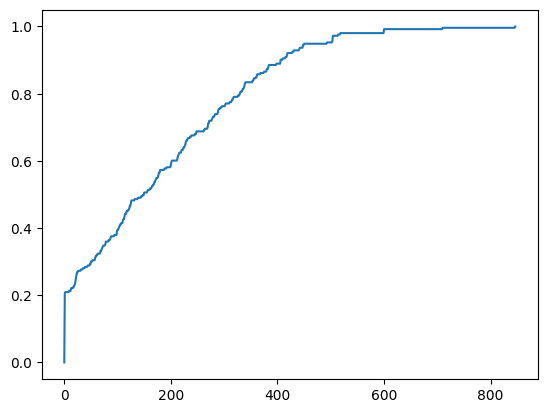

In [5]:
plt.plot(X, Y)
plt.show()

In [ ]:
Найдём квантили, среднее значение, стандартное отклонение, дисперсию и самые частые значения

In [18]:
df.describe(percentiles = [0.01, 0.05, 0.1, 0.2, 0.9, 0.95, 0.99])

,Waste_electricity
count,253.000000
mean,178.442329
std,163.871100
min,0.000000
1%,0.000000
5%,0.000000
10%,0.000000
20%,0.000000
50%,149.015126
90%,405.194310


In [10]:
df.Waste_electricity.var()

26853.737335819686

In [11]:
df.Waste_electricity.value_counts()

Waste_electricity
0.000000      52
503.690564     3
599.823977     3
49.636003      2
176.251555     2
              ..
124.711373     1
125.958780     1
125.971230     1
131.696331     1
845.088025     1
Name: count, Length: 190, dtype: int64

В данном случае у нас кумулятивная функция распределения, которая строго возрастает и у которой первые 20% значений равно 0, остальное распределение увеличивается без резких скачков, а после 95% значений числа начинают возрастать сильно

In [3]:
df_standard = df.copy()

Стандартизируем данные, перед этим скопировав их в отдельный dataframe

In [4]:
df_standard.Waste_electricity = (df_standard.Waste_electricity - df_standard.Waste_electricity.mean())/df_standard.Waste_electricity.std()

In [21]:
X = np.linspace(-2, 4, 1000)
Y = [np.mean(df_standard.Waste_electricity < x) for x in X]

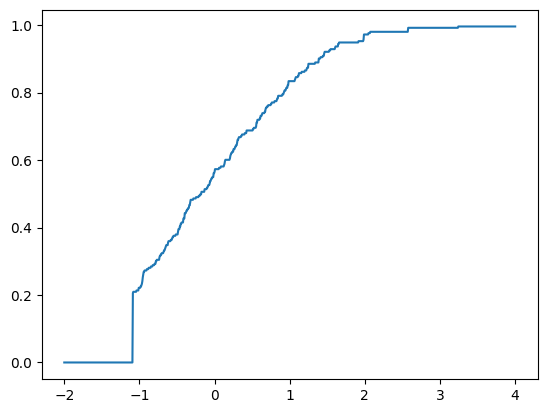

In [22]:
plt.plot(X, Y)
plt.show()

In [ ]:
Найдём те же данные о стандартизированном распределении, которые находили про изначальное

In [8]:
df_standard.describe(percentiles = [0.01, 0.05, 0.1, 0.2, 0.9, 0.95, 0.99])

,Waste_electricity
count,2.530000e+02
mean,5.616939e-17
std,1.000000e+00
min,-1.088919e+00
1%,-1.088919e+00
5%,-1.088919e+00
10%,-1.088919e+00
20%,-1.088919e+00
50%,-1.795753e-01
90%,1.383722e+00


In [10]:
df_standard.Waste_electricity.var()

0.9999999999999999

In [12]:
df_standard.Waste_electricity.value_counts()

Waste_electricity
-1.088919    52
 1.984781     3
 2.571421     3
-0.786022     2
-0.013369     2
             ..
-0.327885     1
-0.320273     1
-0.320197     1
-0.285261     1
 4.068110     1
Name: count, Length: 190, dtype: int64

Как мы видим, после стандартизации область значений распределения расположилась от -1.08 до 4.06. Стандартное отклонение стало равно 1, тогда как до этого было 163.87. Среднее значение стало 0, а было 178.44

## Задание 2

Построим KDE и боксплот по нашим данным

<Axes: xlabel='Waste_electricity', ylabel='Density'>

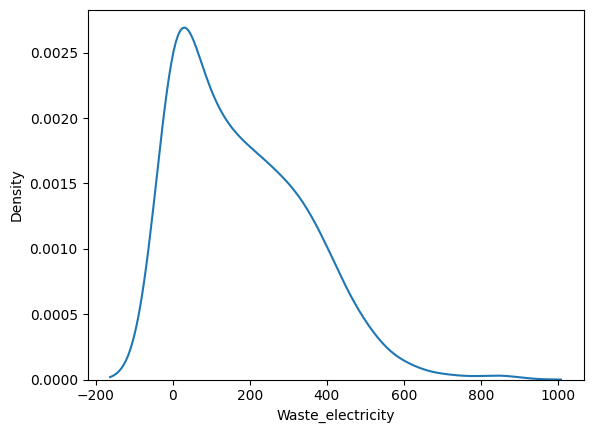

In [23]:
sns.kdeplot(data=df.Waste_electricity)

<Axes: >

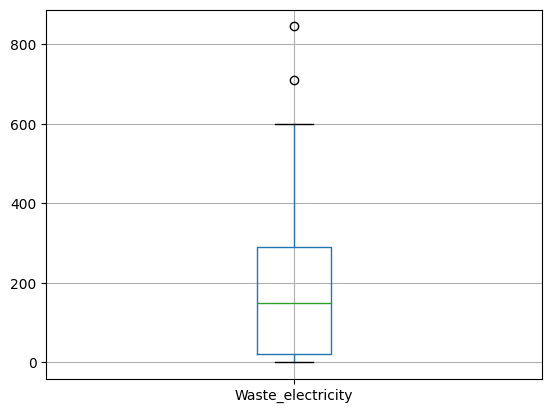

In [24]:
df.boxplot(column=['Waste_electricity'])

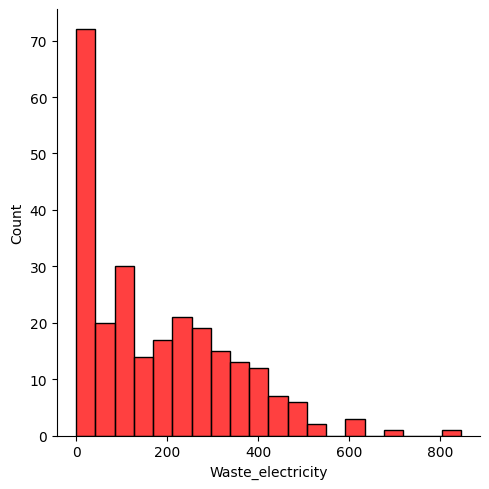

In [29]:
ax = sns.displot(df.Waste_electricity,
                  bins=20,
                  color='red')

Боксплот считает выбросами единичные значения 845 и 709 после трёх значений 599, что вполне возможно, ведь мы говорим о расходе электроэнергии и то, что она так резко начала возрастать. Но в целом нужно больше информации о данных, чтобы точнее оценить, выбросы это или нет